<a href="https://colab.research.google.com/github/Valeria-YL/2047880MINERIA/blob/main/Practicas/Practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 6 - Data classification**
Creamos modelo usando el algoritmo de k-nearest neighbors

In [1]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("sumedh1507/blood-donor-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, "blood_donor_dataset.csv"))
df.head()

Using Colab cache for faster access to the 'blood-donor-dataset' dataset.
Path to dataset files: /kaggle/input/blood-donor-dataset


,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17
1,a6a3f7fe55,Eugene Bowman,hramos@brown-sellers.com,b6Wq6Cqz@5,+61 450709944,Darwin,AB-,Yes,64,8,16,2016-11-11
2,cee6478144,Sheri Bolton DDS,jasmine85@hotmail.com,$9RB51m#s7,+61 428756361,Melbourne,AB+,Yes,39,6,6,2022-02-25
3,5986bc55f9,Kelly Boyd,pattylawrence@riley-hayes.com,@5Tdg(4kCm,+61 454318320,Darwin,A-,No,55,20,20,2025-04-04
4,93246afe6c,Taylor Guzman,martinezjacob@wilson.com,x!)9Ag@J*7,+61 484158472,Darwin,O-,No,7,35,35,2022-11-30


# Preprocesamiento
Eliminamos columnas que no aportan información útil para la predicción (en este caso predecir la disponibilidad del donante).

In [2]:
df_model = df.drop(columns=["donor_id", "name", "email", "password", "contact_number", "created_at"])
df_model = pd.get_dummies(df_model, columns=["city", "blood_group", "availability"], drop_first=True)

# Definimos la variable objetivo
Queremos predecir si un donante está disponible (availability_Yes). Previamente se utilizo pd.
*get_dummies("availability")* por lo que la columna availability se transformó en una columna binaria llamada *availability_Yes* ; (1 representa que el donante esta disponible y 0 que no).

In [3]:
y = df_model["availability_Yes"]

X = df_model.drop(columns=["availability_Yes"])

La variable `X` contiene información del donante (ciudad, grupo sanguíneo).
La variable *y* contiene la etiqueta que queremos predecir.

# Divisón de los datos y entrenamiento del modelo
El 20% de los datos los usamos como prueba y el 80% como entrenamiento

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluación del modelo

In [5]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.4975
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.49      0.47      0.48       992
        True       0.50      0.52      0.51      1008

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



El modelo KNN muestra un rendimiento limitado con una precisión de aproximadamente 49.75%. Las métricas de precisión, recall y f1-score para ambas clases (disponible y no disponible) se mantienen cercanas al 50%, esto significa que el modelo no logro identificar patrones relevantes en los datos.

# Matriz de confusión

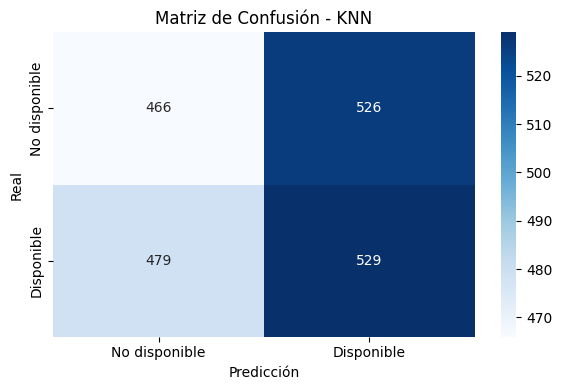

In [6]:
matriz = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=["No disponible", "Disponible"], yticklabels=["No disponible", "Disponible"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.tight_layout()
plt.show()